# Proyek Analisis Data: Nama dataset
- Nama: Dewo Kanirogo
- Email: knrgdewo@gmail.com
- Id Dicoding: dewoknrg

## Menentukan Pertanyaan Bisnis

In [1]:
''' - BAGAIMANA PENGARUH CUACA TERHADAP JUMLAH PEMINJAMAN SEPEDA?
- PADA BULAN APA SAJA PEMINJAMAN SEPEDA PALING BANYAK DAN PALING SEDIKIT?
- APAKAH ADA POLA BERDASARKAN BULAN DAN JAM DALAM JUMLAH SEWA SEPEDA HARIAN?'''

' - BAGAIMANA PENGARUH CUACA TERHADAP JUMLAH PEMINJAMAN SEPEDA?\n- PADA BULAN APA SAJA PEMINJAMAN SEPEDA PALING BANYAK DAN PALING SEDIKIT?\n- APAKAH ADA POLA BERDASARKAN BULAN DAN JAM DALAM JUMLAH SEWA SEPEDA HARIAN?'

- BAGAIMANA PENGARUH CUACA TERHADAP JUMLAH PEMINJAMAN SEPEDA?
- PADA BULAN APA SAJA PEMINJAMAN SEPEDA PALING BANYAK DAN PALING SEDIKIT?
- APAKAH ADA POLA BERDASARKAN BULAN DAN JAM DALAM JUMLAH SEWA SEPEDA HARIAN?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
# --------------------gathering data--------------------
# ambil source data
hour = pd.read_csv("D:\Belajar Python\proyek_akhir\hour.csv") 
day = pd.read_csv("D:\Belajar Python\proyek_akhir\day.csv")

# menghitung jumlah baris setiap DataFrame
print("Jumlah baris di DataFrame day:", day.shape)
print("Jumlah baris di DataFrame hour:", hour.shape)

# melakukan merge pada kedua dataframe hour dan day
bike_sharing = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print("Jumlah baris di DataFrame bike:", bike_sharing.shape)

Jumlah baris di DataFrame day: (731, 16)
Jumlah baris di DataFrame hour: (17379, 17)
Jumlah baris di DataFrame bike: (17379, 32)


### Assessing Data

In [4]:
# --------------------assessing data--------------------
# pengecekan tipe data
hour.info()
day.info()
bike_sharing.info()

# pengecekan missing data pada bike sharing
print("Jumlah missing data: ", bike_sharing.isnull().sum())

# pengecekan duplicated data pada bike sharing
print("Jumlah duplikasi: ", bike_sharing.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

### Cleaning Data

In [5]:
# --------------------cleaning data--------------------
'''dikarenakan tidak ada data yang missing, duplikat dan tidak ada tipe data yang salah, jadi tahap ini dilewat'''

'dikarenakan tidak ada data yang missing, duplikat dan tidak ada tipe data yang salah, jadi tahap ini dilewat'

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# --------------------exploratory data analysis--------------------
# melihat statistik dataframe bikesharing
print(bike_sharing.describe(include="all"))

# menjumlahkan penyewa sepeda perhari berdasarkan musim
print(bike_sharing.groupby(by="season_daily").agg({
    "cnt_daily": "count"
}).sort_values(by="cnt_daily", ascending=False))

# menjumlahkan penyewa sepeda perhari berdasarkan bulan
print(bike_sharing.groupby(by="mnth_daily").agg({
    "cnt_daily": "count"
}).sort_values(by="cnt_daily", ascending=False))

# menjumlahkan penyewa sepeda perhari berdasarkan jam
print(bike_sharing.groupby(by="hr").agg({
    "cnt_hourly": "mean"
}))

        instant_daily      dteday  season_daily      yr_daily    mnth_daily  \
count    17379.000000       17379  17379.000000  17379.000000  17379.000000   
unique            NaN         731           NaN           NaN           NaN   
top               NaN  2011-01-01           NaN           NaN           NaN   
freq              NaN          24           NaN           NaN           NaN   
mean       367.172622         NaN      2.501640      0.502561      6.537775   
std        210.072051         NaN      1.106918      0.500008      3.438776   
min          1.000000         NaN      1.000000      0.000000      1.000000   
25%        185.000000         NaN      2.000000      0.000000      4.000000   
50%        367.000000         NaN      3.000000      1.000000      7.000000   
75%        549.000000         NaN      3.000000      1.000000     10.000000   
max        731.000000         NaN      4.000000      1.000000     12.000000   

        holiday_daily  weekday_daily  workingday_da

## Visualization & Explanatory Analysis

### Pertanyaan 1:

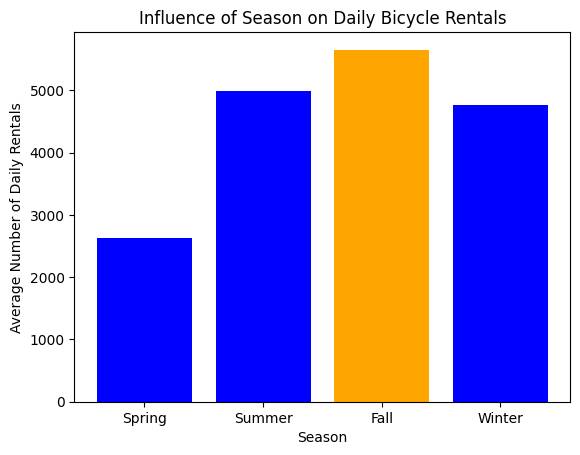

In [7]:
# visualisai penyewa sepeda perhari berdasarkan musim
seasonal_data = bike_sharing.groupby('season_daily')['cnt_daily'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
colors1 = ['blue','blue','orange','blue']

plt.bar(season_names, seasonal_data, color=colors1)
plt.xlabel('Season')
plt.ylabel('Average Number of Daily Rentals')
plt.title('Influence of Season on Daily Bicycle Rentals')
plt.show()

### Pertanyaan 2:

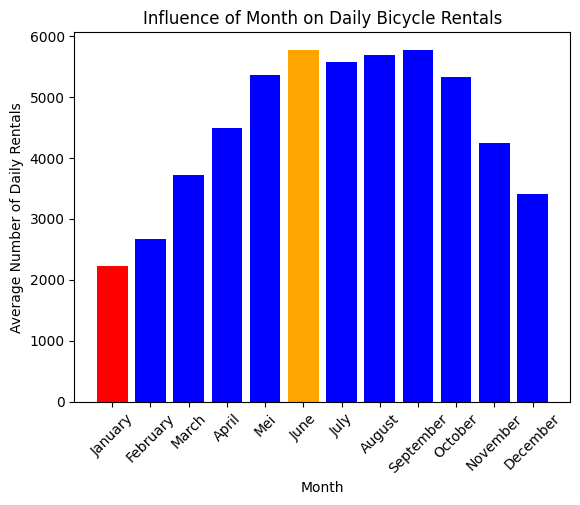

In [8]:
# visualisai penyewa sepeda perhari berdasarkan bulan
monthly_data = bike_sharing.groupby('mnth_daily')['cnt_daily'].mean()
month_names = ['January','February','March','April','Mei','June','July','August','September','October','November','December']
colors2 = ['red','blue','blue','blue','blue','orange','blue','blue','blue','blue','blue','blue']

plt.bar(month_names, monthly_data, color=colors2)
plt.xlabel('Month')
plt.ylabel('Average Number of Daily Rentals')
plt.title('Influence of Month on Daily Bicycle Rentals')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3:

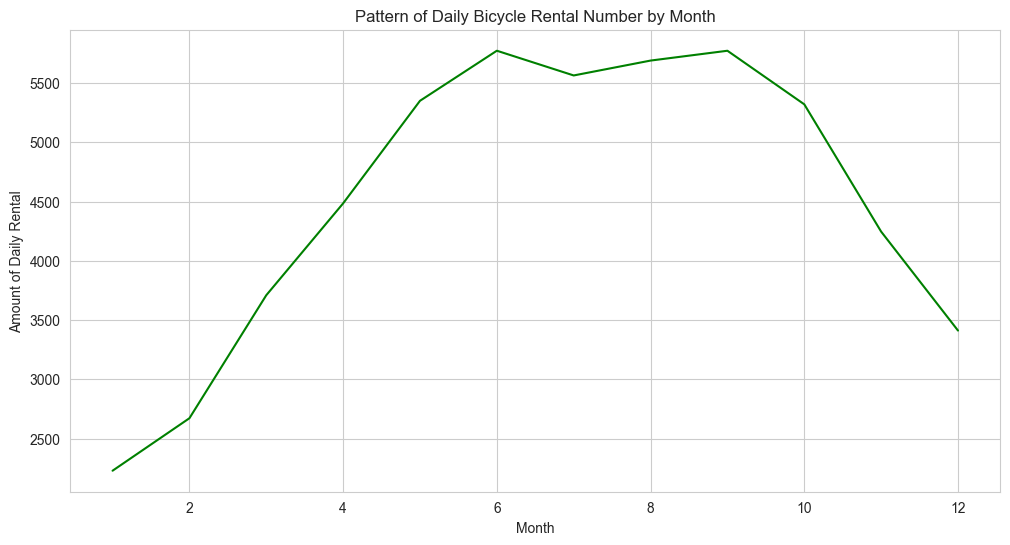

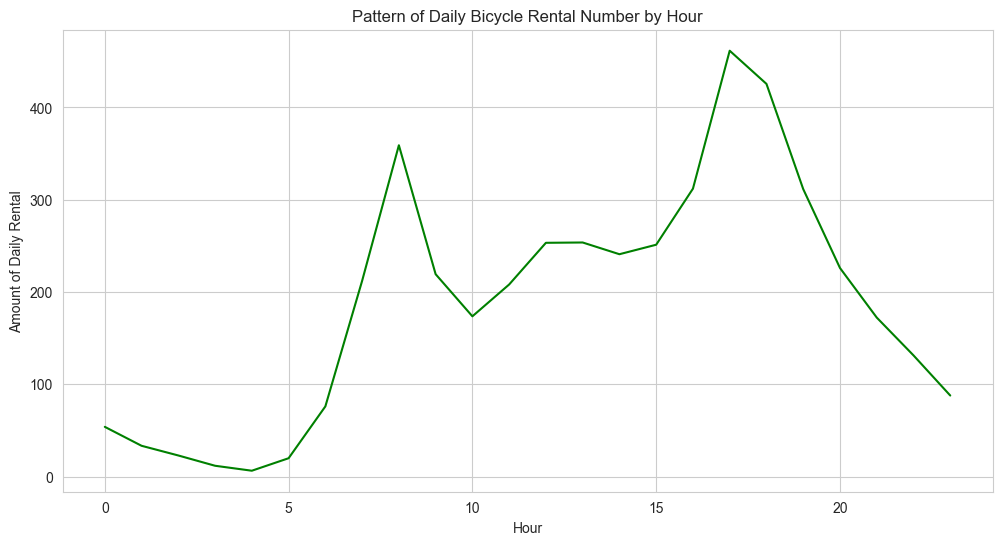

In [9]:
# visualisai pola penyewa sepeda berdasarkan bulan
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth_daily", y="cnt_daily", data=bike_sharing, errorbar=None, color='green')
plt.title("Pattern of Daily Bicycle Rental Number by Month")
plt.xlabel("Month")
plt.ylabel("Amount of Daily Rental")
plt.show()

# visualisai pola penyewa sepeda berdasarkan jam
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=bike_sharing, errorbar=None, color='green')
plt.title("Pattern of Daily Bicycle Rental Number by Hour")
plt.xlabel("Hour")
plt.ylabel("Amount of Daily Rental")
plt.show()

## Conclusion

- Berdasarkan grafik diatas dapat diketahui bahwa jumlah sewa sepeda paling banyak terdapat pada musim gugur/fall season.
- Berdasarkan grafik diatas dapat diketahui bahwa jumlah sewa sepeda paling banyak terdapat pada bulan Juni dan jumlah sewa sepeda paling bsedikit terdapat pada bulan Januari.
- Jika berdasarkan bulan, jumlah sewa sepeda meningkat pada bulan ke-9 dan ke-6. Jika berdasarkan jam, jumlah sewa sepeda meningkat dikisaran jam 8 pagi dan dikisaran jam 5 atau 6 sore.

In [1]:
'''- Berdasarkan grafik diatas dapat diketahui bahwa jumlah sewa sepeda paling banyak terdapat pada musim gugur/fall season.
- Berdasarkan grafik diatas dapat diketahui bahwa jumlah sewa sepeda paling banyak terdapat pada bulan Juni dan jumlah sewa sepeda paling bsedikit terdapat pada bulan Januari.
- Jika berdasarkan bulan, jumlah sewa sepeda meningkat pada bulan ke-9 dan ke-6. Jika berdasarkan jam, jumlah sewa sepeda meningkat dikisaran jam 8 pagi dan dikisaran jam 5 atau 6 sore.'''

'- Berdasarkan grafik diatas dapat diketahui bahwa jumlah sewa sepeda paling banyak terdapat pada musim gugur/fall season.\n- Berdasarkan grafik diatas dapat diketahui bahwa jumlah sewa sepeda paling banyak terdapat pada bulan Juni dan jumlah sewa sepeda paling bsedikit terdapat pada bulan Januari.\n- Jika berdasarkan bulan, jumlah sewa sepeda meningkat pada bulan ke-9 dan ke-6. Jika berdasarkan jam, jumlah sewa sepeda meningkat dikisaran jam 8 pagi dan dikisaran jam 5 atau 6 sore.'